<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.075220,76.683356,73.515125,0.008001,207.281702,207.275606,0.006095
1,0.0,1.0,93.204756,21.521860,64.548635,-0.008842,189.266409,189.268799,-0.002390
2,0.0,2.0,98.340669,96.486522,79.802674,0.000734,284.630598,284.624672,0.005926
3,0.0,3.0,93.710314,44.148697,40.862947,-0.001520,188.720438,188.717846,0.002591
4,0.0,4.0,44.474499,42.846568,76.698919,-0.006055,174.013932,174.020722,-0.006790
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.275661,61.512679,41.524603,0.006213,170.319156,170.312531,0.006625
59996,999.0,56.0,68.951454,64.417959,81.226833,-0.001193,224.595053,224.594553,0.000501
59997,999.0,57.0,71.593868,48.090445,99.660340,-0.008440,229.336213,229.342351,-0.006138
59998,999.0,58.0,43.843667,70.813039,92.959903,-0.008555,217.608054,217.616334,-0.008280


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.075220,76.683356,73.515125,0.008001,207.281702,207.275606,0.006095
1,0.0,1.0,93.204756,21.521860,64.548635,-0.008842,189.266409,189.268799,-0.002390
2,0.0,2.0,98.340669,96.486522,79.802674,0.000734,284.630598,284.624672,0.005926
3,0.0,3.0,93.710314,44.148697,40.862947,-0.001520,188.720438,188.717846,0.002591
4,0.0,4.0,44.474499,42.846568,76.698919,-0.006055,174.013932,174.020722,-0.006790
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.275661,61.512679,41.524603,0.006213,170.319156,170.312531,0.006625
59996,999.0,56.0,68.951454,64.417959,81.226833,-0.001193,224.595053,224.594553,0.000501
59997,999.0,57.0,71.593868,48.090445,99.660340,-0.008440,229.336213,229.342351,-0.006138
59998,999.0,58.0,43.843667,70.813039,92.959903,-0.008555,217.608054,217.616334,-0.008280


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.075220  76.683356  73.515125  0.008001  207.281702   
      1.0    93.204756  21.521860  64.548635 -0.008842  189.266409   
      2.0    98.340669  96.486522  79.802674  0.000734  284.630598   
      3.0    93.710314  44.148697  40.862947 -0.001520  188.720438   
      4.0    44.474499  42.846568  76.698919 -0.006055  174.013932   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.275661  61.512679  41.524603  0.006213  170.319156   
      56.0   68.951454  64.417959  81.226833 -0.001193  224.595053   
      57.0   71.593868  48.090445  99.660340 -0.008440  229.336213   
      58.0   43.843667  70.813039  92.959903 -0.008555  217.608054   
      59.0   62.139122  84.634288  53.424424 -0.004046  210.193788   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.275606  0.006095  
      1.0    189.268799 -0.002390  
      2.0    284.624672  0.005926  
      3.0    188.717846  0.002591  
      4.0    174.020722 -0.006790  
...                 ...       ...  
999.0 55.0   170.312531  0.006625  
      56.0   224.594553  0.000501  
      57.0   229.342351 -0.006138  
      58.0   217.616334 -0.008280  
      59.0   210.197185 -0.003396  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.075220  76.683356  73.515125  0.008001  207.281702   
      1.0    93.204756  21.521860  64.548635 -0.008842  189.266409   
      2.0    98.340669  96.486522  79.802674  0.000734  284.630598   
      3.0    93.710314  44.148697  40.862947 -0.001520  188.720438   
      4.0    44.474499  42.846568  76.698919 -0.006055  174.013932   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.275661  61.512679  41.524603  0.006213  170.319156   
      56.0   68.951454  64.417959  81.226833 -0.001193  224.595053   
      57.0   71.593868  48.090445  99.660340 -0.008440  229.336213   
      58.0   43.843667  70.813039  92.959903 -0.008555  217.608054   
      59.0   62.139122  84.634288  53.424424 -0.004046  210.193788   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.275606  0.006095  
      1.0    189.268799 -0.002390  
      2.0    284.624672  0.005926  
      3.0    188.717846  0.002591  
      4.0    174.020722 -0.006790  
...                 ...       ...  
999.0 55.0   170.312531  0.006625  
      56.0   224.594553  0.000501  
      57.0   229.342351 -0.006138  
      58.0   217.616334 -0.008280  
      59.0   210.197185 -0.003396  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.075220,76.683356,73.515125,0.008001,207.281702,207.275606,0.006095
1,0.0,1.0,93.204756,21.521860,64.548635,-0.008842,189.266409,189.268799,-0.002390
2,0.0,2.0,98.340669,96.486522,79.802674,0.000734,284.630598,284.624672,0.005926
3,0.0,3.0,93.710314,44.148697,40.862947,-0.001520,188.720438,188.717846,0.002591
4,0.0,4.0,44.474499,42.846568,76.698919,-0.006055,174.013932,174.020722,-0.006790
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.275661,61.512679,41.524603,0.006213,170.319156,170.312531,0.006625
59996,999.0,56.0,68.951454,64.417959,81.226833,-0.001193,224.595053,224.594553,0.000501
59997,999.0,57.0,71.593868,48.090445,99.660340,-0.008440,229.336213,229.342351,-0.006138
59998,999.0,58.0,43.843667,70.813039,92.959903,-0.008555,217.608054,217.616334,-0.008280


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.075220  76.683356  73.515125  0.008001  207.281702   
      1.0    93.204756  21.521860  64.548635 -0.008842  189.266409   
      2.0    98.340669  96.486522  79.802674  0.000734  284.630598   
      3.0    93.710314  44.148697  40.862947 -0.001520  188.720438   
      4.0    44.474499  42.846568  76.698919 -0.006055  174.013932   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.275661  61.512679  41.524603  0.006213  170.319156   
      56.0   68.951454  64.417959  81.226833 -0.001193  224.595053   
      57.0   71.593868  48.090445  99.660340 -0.008440  229.336213   
      58.0   43.843667  70.813039  92.959903 -0.008555  217.608054   
      59.0   62.139122  84.634288  53.424424 -0.004046  210.193788   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.275606  0.006095  
      1.0    189.268799 -0.002390  
      2.0    284.624672  0.005926  
      3.0    188.717846  0.002591  
      4.0    174.020722 -0.006790  
...                 ...       ...  
999.0 55.0   170.312531  0.006625  
      56.0   224.594553  0.000501  
      57.0   229.342351 -0.006138  
      58.0   217.616334 -0.008280  
      59.0   210.197185 -0.003396  

[60000 rows x 7 columns]

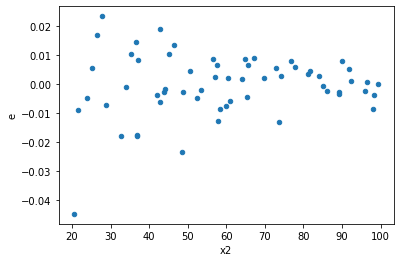

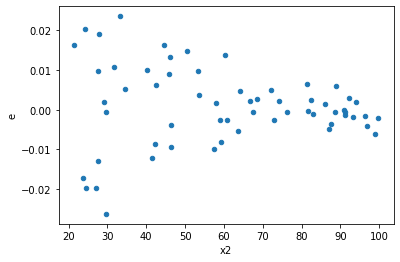

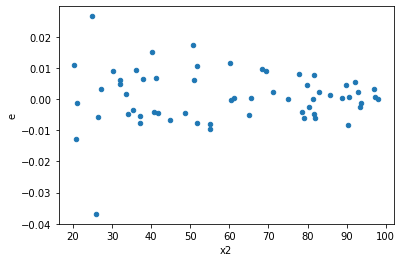

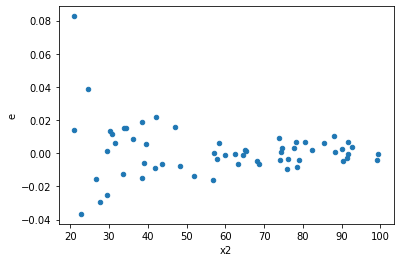

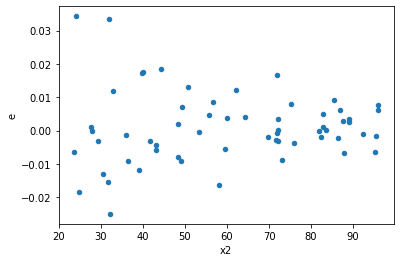

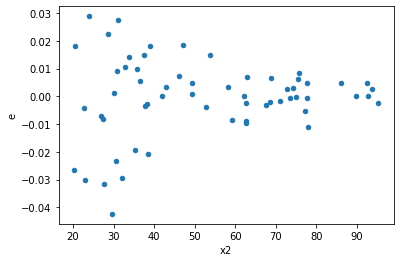

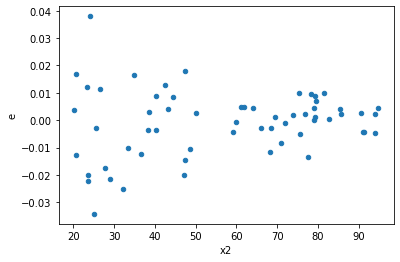

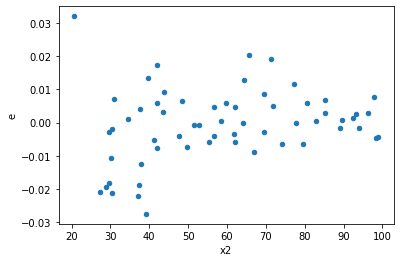

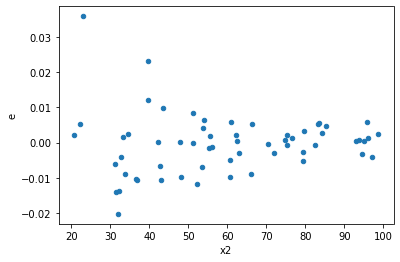

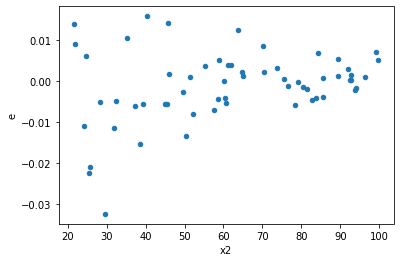

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,0.0023048781962235745,0.002311767833245042,0.00010975610458207497,0.0001100841825354782,1.0029891544953464,0.9946080210657982,0.5026959894671009,0.4973040105328991,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,0.0021512312367551055,0.0029329383417886425,0.00010243958270262407,0.00013966373056136392,1.363376605767707,0.48365519113558375,0.7581724044322081,0.24182759556779188,Reject005=1 : Homoscedasticity
32.0,21.0,21.0,0.0012156058518152926,0.0019120654903140733,5.7885992943585365e-05,9.10507376340035e-05,1.572932120603682,0.30713057545621014,0.8464347122718949,0.15356528772810507,Reject005=1 : Homoscedasticity
62.0,21.0,21.0,0.0012862333395434764,0.0030231860531921197,6.124920664492744e-05,0.00014396124062819617,2.3504180464371585,0.056519470344931655,0.9717402648275342,0.028259735172465827,Reject005=1 : Homoscedasticity
98.0,21.0,21.0,0.002555720852951121,0.0029581331992099146,0.00012170099299767241,0.0001408634856766626,1.1574555162368863,0.7406954841959228,0.6296522579020386,0.3703477420979614,Reject005=1 : Homoscedasticity
100.0,21.0,21.0,0.0015140681895484977,0.0018421658779843048,7.209848521659513e-05,8.772218466591927e-05,1.2166994133425701,0.6572233669977048,0.6713883165011476,0.3286116834988524,Reject005=1 : Homoscedasticity
121.0,21.0,21.0,0.0020058140041196867,0.0027314425206392506,9.551495257712793e-05,0.00013006869145901193,1.3617626135968817,0.48532133956449974,0.7573393302177501,0.24266066978224987,Reject005=1 : Homoscedasticity
128.0,21.0,21.0,0.0009087946370155101,0.0010246268161539665,4.327593509597667e-05,4.879175315018888e-05,1.1274569351760815,0.7859746951022322,0.6070126524488839,0.3929873475511161,Reject005=1 : Homoscedasticity
130.0,21.0,21.0,0.0029976653853089966,0.004064650786326671,0.00014274597072899984,0.00019355479934888908,1.3559387936514768,0.49137632023239375,0.7543118398838031,0.24568816011619687,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.0023048781962235745,0.002311767833245042,0.00010975610458207497,0.0001100841825354782,1.0029891544953464,0.9946080210657982,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,0.00267767382401211,0.0009861965128425483,0.00012750827733391001,4.6961738706788013e-05,0.3683034520481192,0.0265838701394652,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,0.002907655474754852,0.0006477853877100468,0.00013845978451213582,3.084692322428794e-05,0.22278615652174621,0.0011167370641371464,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,0.011082342977540207,0.001247144109372497,0.0005277306179781051,5.938781473202366e-05,0.11253433609661735,5.141910775331203e-06,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,0.004537363279753602,0.0008968410267061281,0.00021606491808350486,4.270671555743467e-05,0.19765687061205078,0.00047042119298939297,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,0.006007435370072635,0.0022963675838957435,0.00028606835095583975,0.00010935083732836874,0.3822542303718498,0.03251851080080887,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,0.0046368422645986646,0.0011650822566081644,0.0002208020125999364,5.548010745753164e-05,0.2512663123141642,0.0025593420550629486,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,0.0021512312367551055,0.0029329383417886425,0.00010243958270262407,0.00013966373056136392,1.363376605767707,0.48365519113558375,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,0.002772014808707102,0.0005545031831462482,0.00013200070517652867,2.6404913483154675e-05,0.20003615471479913,0.000513760693386186,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    679
Reject005=1 : Homoscedasticity      321
Name: Result_test, dtype: int64